In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow import keras
from keras import metrics
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import recall_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset 
df = pd.read_csv('home_loan_data.csv')
# pd.set_option('display.max_columns', None)

# Display the first few rows to understand the structure
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df.shape

(307511, 122)

In [5]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [7]:
# Check for null values 
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
#(df.columns[df.isnull().any()])

In [9]:
df.isnull().sum().sort_values(ascending= False).head(20)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
FLOORSMIN_AVG               208642
FLOORSMIN_MODE              208642
FLOORSMIN_MEDI              208642
YEARS_BUILD_MEDI            204488
YEARS_BUILD_MODE            204488
YEARS_BUILD_AVG             204488
OWN_CAR_AGE                 202929
LANDAREA_MEDI               182590
LANDAREA_MODE               182590
LANDAREA_AVG                182590
dtype: int64

In [10]:
#df.select_dtypes(include=['int64'])
#df.select_dtypes(include=['float64'])
#df.select_dtypes(include=['object'])

In [11]:
# For numerical columns, fill missing values with the median and for categorical columns, fill them with mode
for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0] if not df[col].mode().empty else 'Unknown')
        else:
            df[col] =  df[col].fillna(df[col].median())

In [12]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [13]:
# TARGET: Whether the loan was repaid (0 for yes, 1 for no).
default_percentage = (df['TARGET'].sum() / len(df['TARGET'])) * 100
print(f"Percentage of default cases: {default_percentage:.2f}%")

payer_percentage = 100 - default_percentage
print(f"Percentage of on-time payers: {payer_percentage:.2f}%")

print(f"Class Distribution:\n{df['TARGET'].value_counts()}")

Percentage of default cases: 8.07%
Percentage of on-time payers: 91.93%
Class Distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64


In [14]:
# Separate features (X) and target (y)
X = df.drop(['SK_ID_CURR','TARGET'], axis=1)
y = df['TARGET']

# Encode categorical columns with label encoding
categorical_cols = X.select_dtypes(include = ['object']).columns
print(f"Categorical columns to encode:{list(categorical_cols)}")

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    
print("\nCategorical encoding completed")

Categorical columns to encode:['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']

Categorical encoding completed


In [15]:
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,1,0,0,0,157500.0,254700.0,27558.0,225000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,0,0,0,1,0,72000.0,269550.0,12001.5,225000.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,6,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,0,0,0,1,0,171000.0,370107.0,20205.0,319500.0,6,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Split into train and test sets before applying SMOTE to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Class Distribution:\n{pd.Series(y_train).value_counts()}")

Training set shape: (246008, 120)
Test set shape: (61503, 120)
Class Distribution:
TARGET
0    226148
1     19860
Name: count, dtype: int64


In [17]:
# Apply SMOTE to the training data only to avoid data leakage
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [18]:
print(f"Balanced training set shape: {X_train_balanced.shape}")
print(f"Balanced Class Distribution:\n{pd.Series(y_train_balanced).value_counts()}")

Balanced training set shape: (452296, 120)
Balanced Class Distribution:
TARGET
0    226148
1    226148
Name: count, dtype: int64


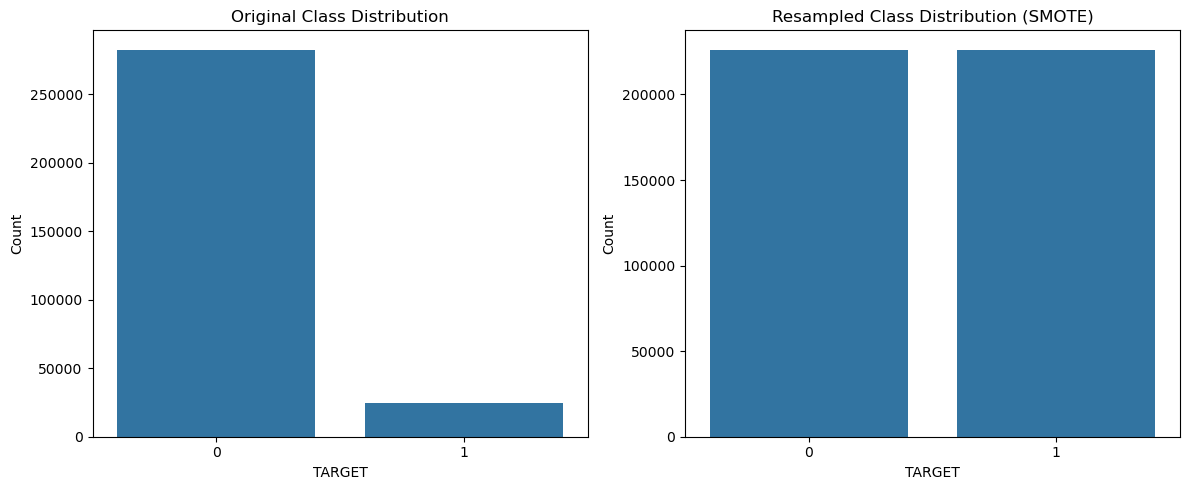

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original data plot
sns.countplot(x='TARGET',data = df, ax=axes[0])
axes[0].set_title('Original Class Distribution')
axes[0].set_xlabel('TARGET')
axes[0].set_ylabel('Count')

# Resampled data plot
sns.countplot(x=y_train_balanced, ax=axes[1])
axes[1].set_title('Resampled Class Distribution (SMOTE)')
axes[1].set_xlabel('TARGET')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [20]:
# Feature Scaling: Neural networks perform better when inputs are scaled

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (452296, 120)
X_test_scaled shape: (61503, 120)


In [21]:
# Build Deep Learning model using Keras
model = Sequential([
    
    layers.Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    # Output layer with sigmoid activation for binary classification
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = [keras.metrics.AUC(name='auc')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          15,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,857 (101.00 KB)

 Trainable params: 25,857 (101.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train_balanced), y=y_train_balanced)
print(class_weights)
class_weights_dict = dict(zip(np.unique(y_train_balanced), class_weights))
print(class_weights_dict)

[1. 1.]
{0: 1.0, 1: 1.0}


In [23]:
# Train the model
history = model.fit(
    X_train_scaled, y_train_balanced,
    validation_data=(X_test_scaled, y_test),
    epochs=10,          # Number of training epochs
    batch_size=64,      # Batch size
    verbose=1,
    class_weight=class_weights_dict
)


Epoch 1/10
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - auc: 0.9203 - loss: 0.3568 - val_auc: 0.6748 - val_loss: 0.3812
Epoch 2/10
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - auc: 0.9388 - loss: 0.3058 - val_auc: 0.6896 - val_loss: 0.3463
Epoch 3/10
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - auc: 0.9449 - loss: 0.2875 - val_auc: 0.6884 - val_loss: 0.3378
Epoch 4/10
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - auc: 0.9483 - loss: 0.2759 - val_auc: 0.6894 - val_loss: 0.3389
Epoch 5/10
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - auc: 0.9510 - loss: 0.2666 - val_auc: 0.6906 - val_loss: 0.3279
Epoch 6/10
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - auc: 0.9526 - loss: 0.2606 - val_auc: 0.7008 - val_loss: 0.3119
Epoch 7/10
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - auc: 0.9541 - loss: 0.2549 - val_auc: 0.6932 - val_loss: 0.3175
Epoch 8/10
7068/7068 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - auc: 0.9554 - loss: 0.2506 - val_auc: 0.7022 - val_loss: 0.3000
Epoch 9/10
7068/7068 ━━━━━━━━━━━

In [24]:
# Predict probabilities on the test set
y_pred_probs = model.predict(X_test_scaled).ravel()
print(y_pred_probs[:10])
# Convert probabilities to binary class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)
print(y_pred[:10])

1922/1922 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
[0.05140054 0.27218255 0.36351377 0.17510198 0.13880527 0.6357963
 0.03491205 0.02968404 0.7860641  0.12836026]
[0 0 0 0 0 1 0 0 1 0]


In [25]:
# Calculate sensitivity (Recall for positive class)
sensitivity = recall_score(y_test, y_pred)
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# sensitivity = tp / (tp+fn)
print(f"Model Sensitivity (Recall): {sensitivity:.4f}")

# Optional: Print full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Sensitivity (Recall): 0.0896

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     56538
           1       0.16      0.09      0.11      4965

    accuracy                           0.89     61503
   macro avg       0.54      0.52      0.53     61503
weighted avg       0.86      0.89      0.87     61503



In [26]:
# Calculate ROC curve and AUC
roc_auc_score = roc_auc_score(y_test, y_pred_probs)

print(f"Area under ROC curve i.e. AUC: {roc_auc_score:.4f}")

Area under ROC curve i.e. AUC: 0.6959


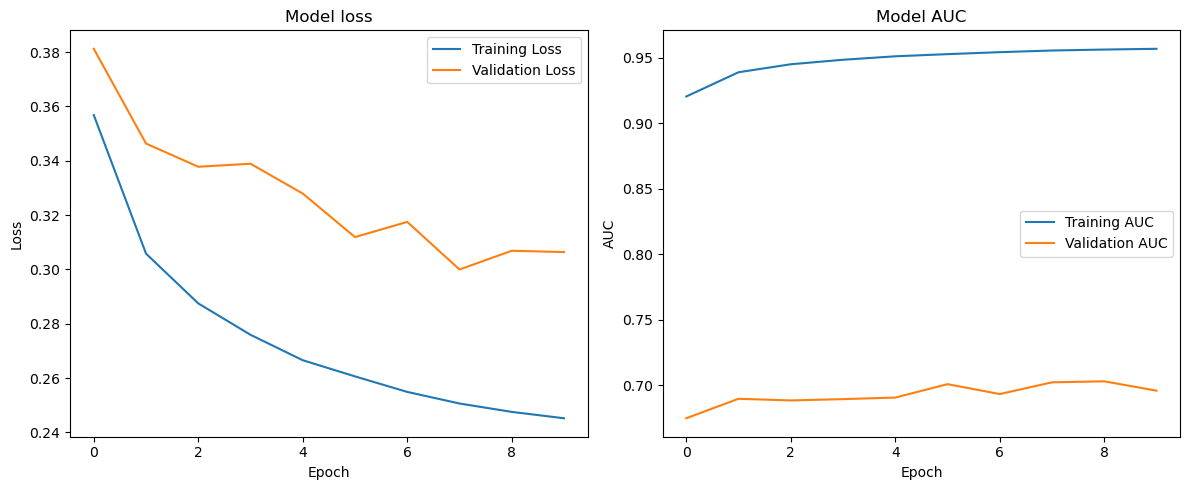

In [27]:
# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
axes[0].set_title('Model loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['auc'], label = 'Training AUC')
plt.plot(history.history['val_auc'], label = 'Validation AUC') 
axes[1].set_title('Model AUC')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()